Load the dataset

In [3]:
import pandas as pd

# Load CSV file
df = pd.read_csv("country_wise_latest.csv")

# Show first 5 rows
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


Explore and clean data

In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (187, 15)
Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


In [8]:
df.isnull().sum()


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [10]:
df.dtypes


Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [12]:
df .info

<bound method DataFrame.info of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Rec

In [14]:
# Get summary statistics for numerical columns
df.describe()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


Visualization

C:\Users\Shirley\AppData\Local\Temp\ipykernel_5636\3751845346.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top10_confirmed, palette='Reds_r')


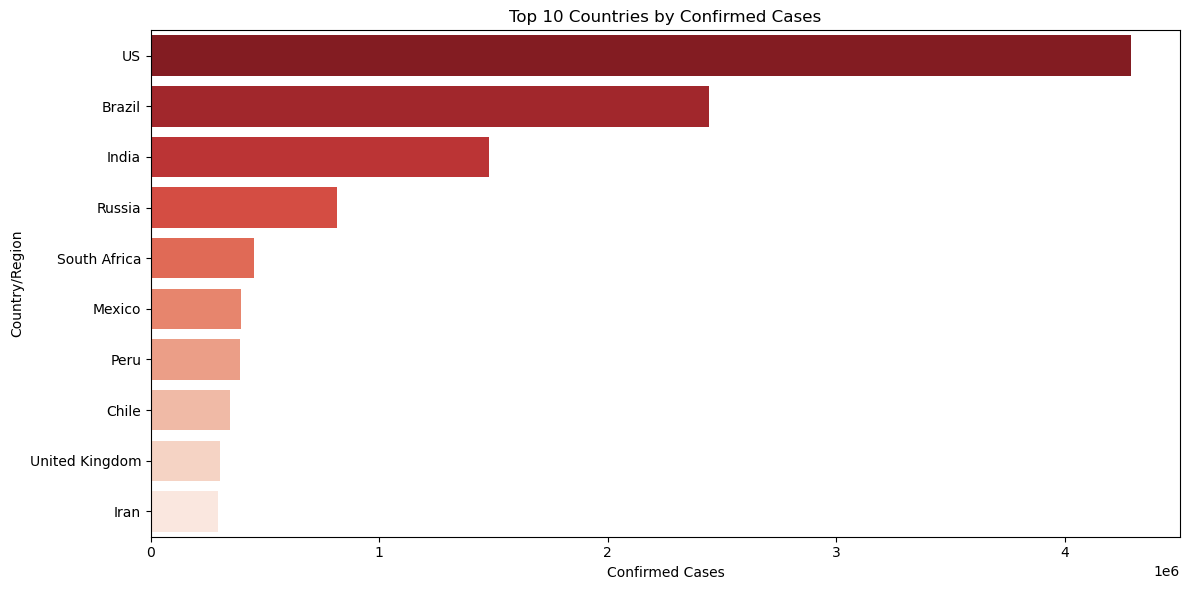

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top10_confirmed = df.sort_values('Confirmed', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y='Country/Region', data=top10_confirmed, palette='Reds_r')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()


C:\Users\Shirley\AppData\Local\Temp\ipykernel_5636\2866679141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Country/Region', data=top10_deaths, palette='Greys_r')


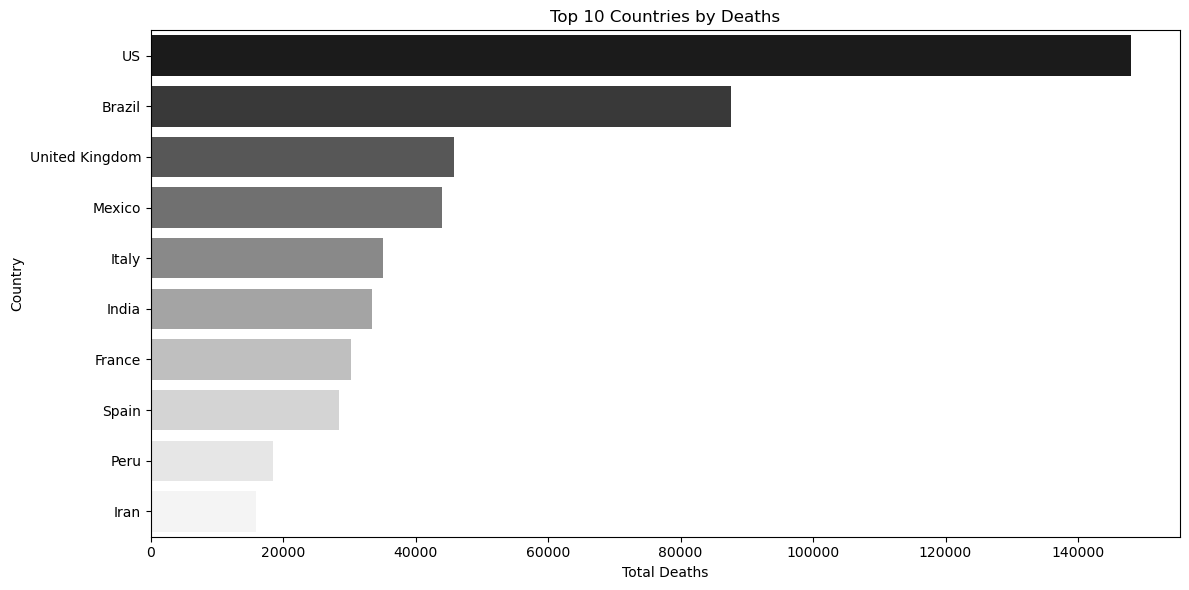

In [39]:


# Sort and select top 10 countries by death count
top10_deaths = df.sort_values('Deaths', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Deaths', y='Country/Region', data=top10_deaths, palette='Greys_r')
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


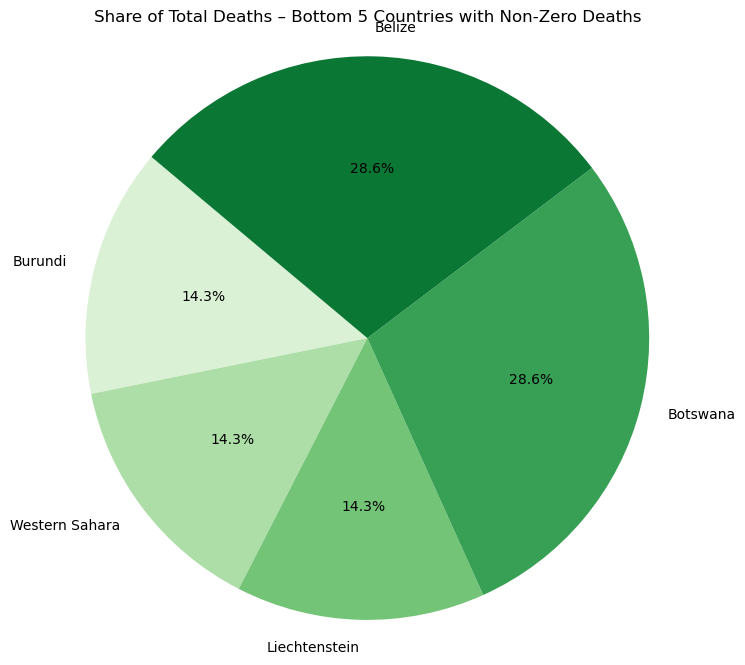

In [47]:
# Sort by deaths (ascending) and select last 5 (with non-zero deaths)
bottom5_deaths = df[df['Deaths'] > 0].sort_values('Deaths', ascending=True).head(5)

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(bottom5_deaths['Deaths'],
        labels=bottom5_deaths['Country/Region'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Greens', 5))

plt.title('Share of Total Deaths – Bottom 5 Countries with Non-Zero Deaths')
plt.axis('equal')
plt.show()


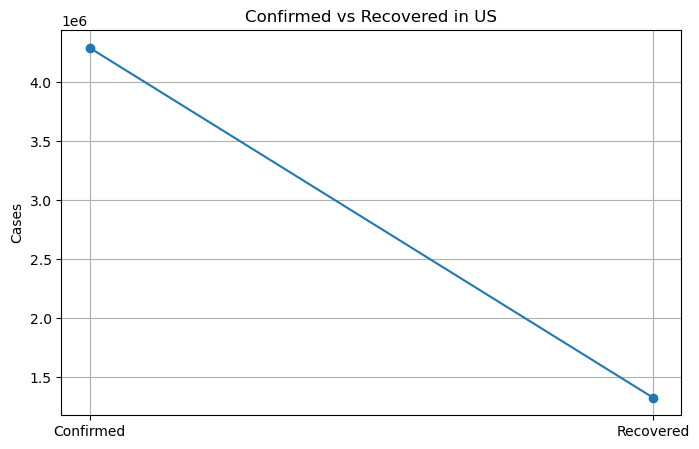

In [23]:
top_country = df.sort_values('Confirmed', ascending=False).iloc[0]

# Create a line plot for Confirmed and Recovered
labels = ['Confirmed', 'Recovered']
values = [top_country['Confirmed'], top_country['Recovered']]

plt.figure(figsize=(8,5))
plt.plot(labels, values, marker='o')
plt.title(f"Confirmed vs Recovered in {top_country['Country/Region']}")
plt.ylabel('Cases')
plt.grid(True)
plt.show()


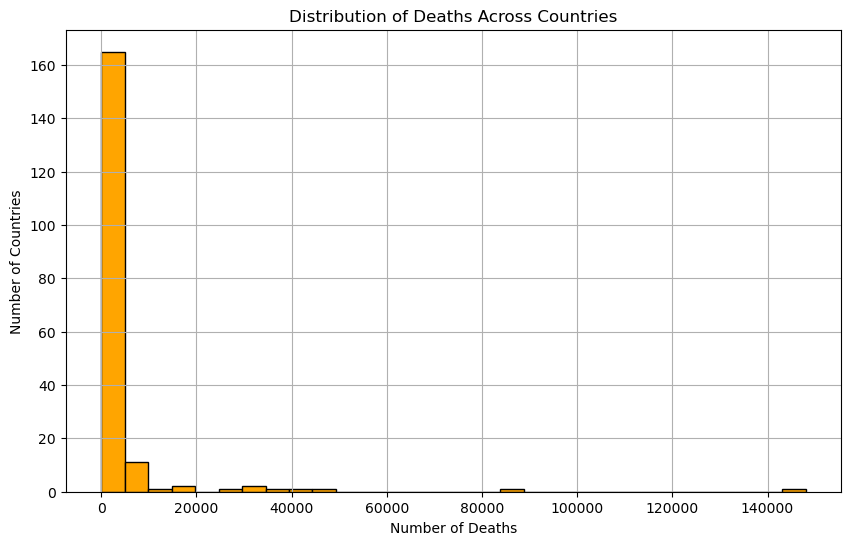

In [25]:
plt.figure(figsize=(10,6))
plt.hist(df['Deaths'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Deaths Across Countries')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()


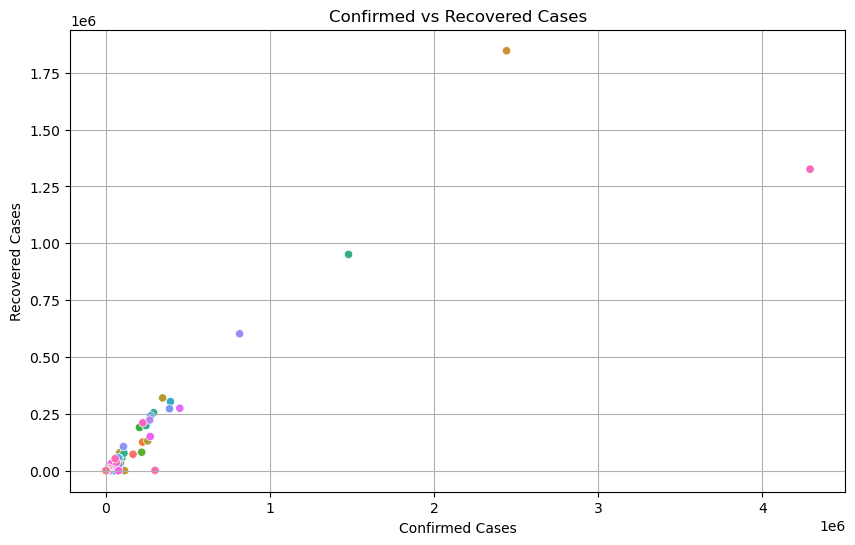

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Confirmed', y='Recovered', hue='Country/Region', legend=False)
plt.title('Confirmed vs Recovered Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.grid(True)
plt.show()


In [29]:
print("Mean confirmed cases:", df['Confirmed'].mean())
print("Median confirmed cases:", df['Confirmed'].median())
print("Mode confirmed cases:", df['Confirmed'].mode()[0])


Mean confirmed cases: 88130.935828877
Median confirmed cases: 5059.0
Mode confirmed cases: 24


In [31]:
print("Standard deviation of deaths:", df['Deaths'].std())
print("Variance of deaths:", df['Deaths'].var())


Standard deviation of deaths: 14100.002482018483
Variance of deaths: 198810069.99292737


In [33]:
# Correlation matrix
df.corr(numeric_only=True)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


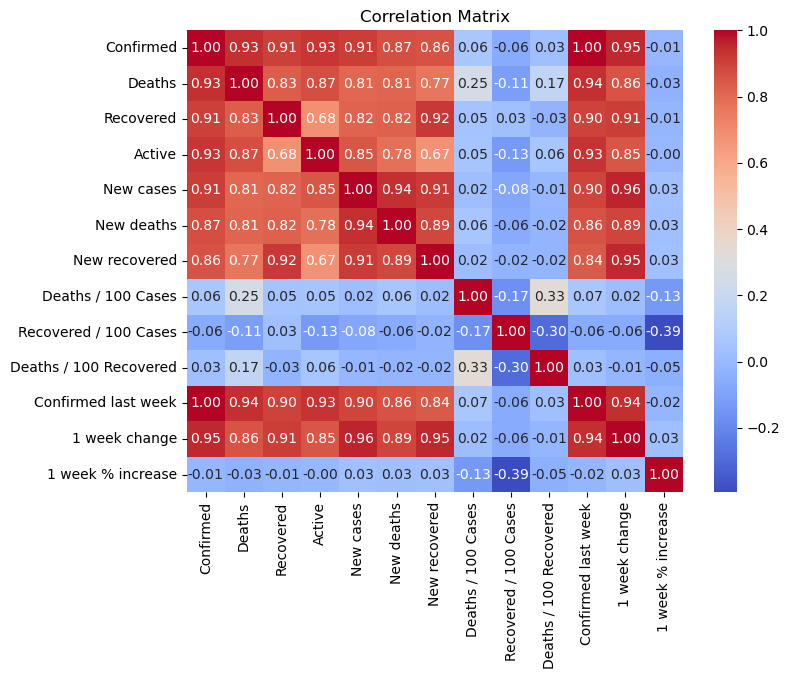

In [35]:


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
